<a href="https://colab.research.google.com/github/Badrieshwar/Cat-and-Dog-classification/blob/main/Cat-and-Dog-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:04<00:00, 242MB/s]
100% 1.06G/1.06G [00:04<00:00, 270MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_data=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
  image_size=(256,256)
)
validation_data=keras.utils.image_dataset_from_directory(
 directory='/content/test',
 labels='inferred',
 label_mode='int',
 batch_size=32,
 image_size=(256,256)
 )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

train_data=train_data.map(process)
validation_data=validation_data.map(process)

In [ ]:
#create CNN model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,epochs=10,validation_data=validation_data)

Epoch 1/10
625/625 [==============================] - 70s 105ms/step - loss: 1.3804 - accuracy: 0.5747 - val_loss: 0.6856 - val_accuracy: 0.5388
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5670 - accuracy: 0.7058 - val_loss: 0.5581 - val_accuracy: 0.7068
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4788 - accuracy: 0.7734 - val_loss: 0.6164 - val_accuracy: 0.6314
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4087 - accuracy: 0.8149 - val_loss: 0.4877 - val_accuracy: 0.7722
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3467 - accuracy: 0.8469 - val_loss: 0.5347 - val_accuracy: 0.7752
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2796 - accuracy: 0.8809 - val_loss: 1.4178 - val_accuracy: 0.6664
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1972 - accuracy: 0.9184 - val_loss: 0.6057 - val_ac

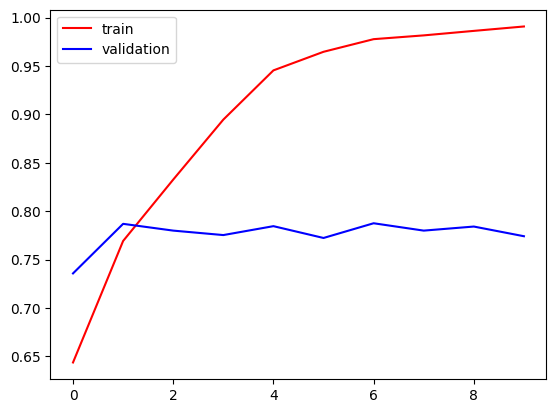

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

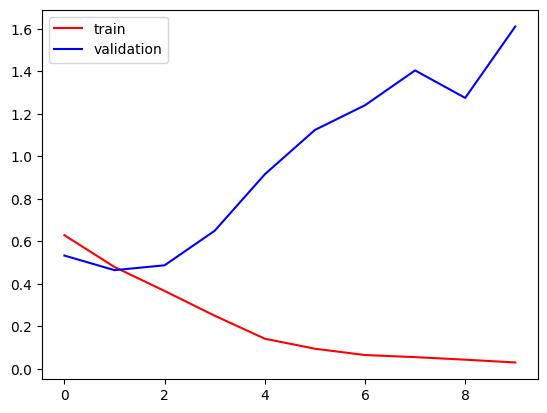

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img1=cv2.imread('/content/dog.jpeg')

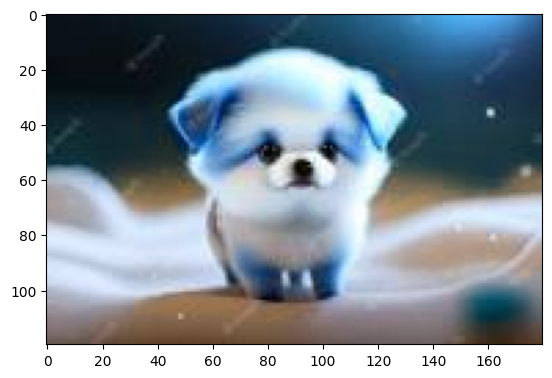

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_img2=cv2.imread('/content/cat.jpeg')

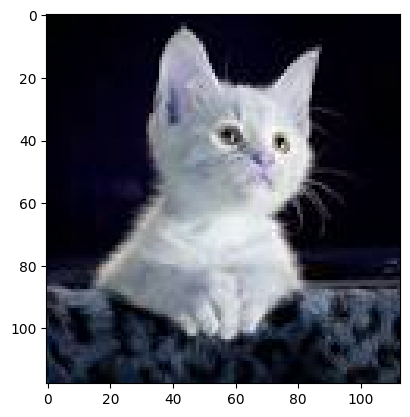

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img1.shape

(120, 180, 3)

In [ ]:
test_img1=cv2.resize(test_img1,(256,256))

In [ ]:
test_img1.shape

(256, 256, 3)

In [ ]:
test_input=test_img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 353ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img2.shape

(118, 113, 3)

In [ ]:
test_img2=cv2.resize(test_img2,(256,256))

In [ ]:
test_input=test_img2.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 37ms/step


array([[0.]], dtype=float32)